<a href="https://colab.research.google.com/github/amhaiskar0921/AmazonProject/blob/main/LogsiticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_merged = pd.read_csv('/content/drive/MyDrive/Amazon (LA) - Multi-Class Product Classification (Team A)/Datasets/preprocessed_merged_data.csv')
df_merged.head(20)

,product_id,product_locale,product_title,product_description,product_brand,esci_label,query,bert_input
0,B00BO9BGYU,es,light irridiance oxigenada 20vol 1000ml l negr...,NaN,light irridiance,I,yunsey tinte amoniaco,[CLS] yunsey tinte amoniaco [SEP] light irridi...
1,3836582864,es,peter lindbergh fashion photography 40th anniv...,NaN,taschen,I,libro channel decoracion,[CLS] libro channel decoracion [SEP] peter lin...
2,B085TCJ87R,us,lenovo thinkcentre m75s small form factor sff ...,NaN,lenovo,I,ryzen 11,[CLS] ryzen 11 [SEP] lenovo thinkcentr m75 sma...
3,B002T3RV5S,us,delta faucet foundations single function tub s...,NaN,delta faucet,I,tub faucet without shower head,[CLS] tub faucet without shower head [SEP] del...
4,B082KFTF41,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old,[CLS] educ toy 3 year old [SEP] kokodi lcd wri...
5,B01N0DZF25,jp,小学館の図鑑neo 新版 動物,ご注意 お使いの端末によっては 一部読みづらい場合がございます お手持ちの端末で立ち読みファ...,NaN,I,学校に行きたくない君へ,[CLS] 学校 に 行き たく ない 君 へ [SEP] 小学 館 の 図鑑 neo 新版...
6,B01N0DZF25,jp,小学館の図鑑neo 新版 動物,ご注意 お使いの端末によっては 一部読みづらい場合がございます お手持ちの端末で立ち読みファ...,NaN,I,子なし のリアル,[CLS] 子 なし の リアル [SEP] 小学 館 の 図鑑 neo 新版 動物 [SE...
7,B084GXV474,us,tracfone carrier locked samsung galaxy j7 crow...,NaN,tracfone,E,android phone,[CLS] android phone [SEP] tracfon carrier lock...
8,B084GXV474,us,tracfone carrier locked samsung galaxy j7 crow...,NaN,tracfone,E,used phones,[CLS] use phone [SEP] tracfon carrier lock sam...
9,B08467FBSR,us,hind 4pk active workout athletic shorts girls ...,hind 4 pack athletic shorts girls perfect pack...,hind,S,soccer shorts girls,[CLS] soccer short girl [SEP] hind 4pk activ w...


In [4]:
df_merged.drop(columns=["bert_input", "product_id"], inplace=True)
df_merged.head()

,product_locale,product_title,product_description,product_brand,esci_label,query
0,es,light irridiance oxigenada 20vol 1000ml l negr...,NaN,light irridiance,I,yunsey tinte amoniaco
1,es,peter lindbergh fashion photography 40th anniv...,NaN,taschen,I,libro channel decoracion
2,us,lenovo thinkcentre m75s small form factor sff ...,NaN,lenovo,I,ryzen 11
3,us,delta faucet foundations single function tub s...,NaN,delta faucet,I,tub faucet without shower head
4,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old


In [5]:
df_merged.fillna("", inplace=True)
df_merged.head()

,product_locale,product_title,product_description,product_brand,esci_label,query
0,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,I,yunsey tinte amoniaco
1,es,peter lindbergh fashion photography 40th anniv...,,taschen,I,libro channel decoracion
2,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,I,ryzen 11
3,us,delta faucet foundations single function tub s...,,delta faucet,I,tub faucet without shower head
4,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old


##Preparing data for logistic regression

### Step 1: Combine Text Columns

In [6]:
# Create a new column for BERT input
df_merged['lr_input'] = ""

# Apply functions based on the language specified in the product_locale column
for index, row in df_merged.iterrows():
    locale = row['product_locale']
    query_text = row['query']
    title_text = row['product_title']
    description_text = row['product_description']
    brand_text = row['product_brand']


    lr_input = f'{query_text} {title_text} {description_text} {brand_text}'
    df_merged.at[index, 'lr_input'] = lr_input

In [7]:
df_merged.head()

,product_locale,product_title,product_description,product_brand,esci_label,query,lr_input
0,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,I,yunsey tinte amoniaco,yunsey tinte amoniaco light irridiance oxigena...
1,es,peter lindbergh fashion photography 40th anniv...,,taschen,I,libro channel decoracion,libro channel decoracion peter lindbergh fashi...
2,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,I,ryzen 11,ryzen 11 lenovo thinkcentre m75s small form fa...
3,us,delta faucet foundations single function tub s...,,delta faucet,I,tub faucet without shower head,tub faucet without shower head delta faucet fo...
4,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old,educational toys 3 year old kokodi lcd writing...


### Step 2: Tokenization with Count Vectors

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df_merged['lr_input'])

####Scaling X-count because we were getting convergence errors with the logistic regression model

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_count_scaled = scaler.fit_transform(X_count)

### Step 3: Tokenization with TF-IDF


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_merged['lr_input'])

In [11]:
label_map = {"E": 0, "S": 1, "C": 2, "I": 3}

# Assuming df_merged is your DataFrame containing the "esci_label" column
df_merged["esci_label"] = df_merged["esci_label"].map(label_map)

In [12]:
df_merged.head()

,product_locale,product_title,product_description,product_brand,esci_label,query,lr_input
0,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,3,yunsey tinte amoniaco,yunsey tinte amoniaco light irridiance oxigena...
1,es,peter lindbergh fashion photography 40th anniv...,,taschen,3,libro channel decoracion,libro channel decoracion peter lindbergh fashi...
2,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,3,ryzen 11,ryzen 11 lenovo thinkcentre m75s small form fa...
3,us,delta faucet foundations single function tub s...,,delta faucet,3,tub faucet without shower head,tub faucet without shower head delta faucet fo...
4,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,0,educational toys 3 year old,educational toys 3 year old kokodi lcd writing...


In [13]:
y = df_merged['esci_label']

### Step 4: Train Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X_count_train, X_count_test, y_train, y_test = train_test_split(X_count_scaled, y, test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

###Training + getting overall f1-score

In [16]:
from sklearn.metrics import f1_score

In [17]:
# Initialize and train the logistic regression model on count vectors
logreg_count_model = LogisticRegression()
logreg_count_model.fit(X_count_train, y_train)
y_count_pred = logreg_count_model.predict(X_count_test)
f1_score_total = f1_score(y_test, y_count_pred, average='micro')
print(f'Count Vectors micro-avg F1-score: {f1_score_total}')

Count Vectors micro-avg F1-score: 0.6034958601655934


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Initialize and train the logistic regression model on TF-IDF vectors
logreg_tfidf_model = LogisticRegression()
logreg_tfidf_model.fit(X_tfidf_train, y_train)
y_tfidf_pred = logreg_tfidf_model.predict(X_tfidf_test)
f1_score_total = f1_score(y_test, y_tfidf_pred, average='micro')
print(f'TF-IDF micro-avg F1-score: {f1_score_total}')

TF-IDF micro-avg F1-score: 0.6375344986200552


###f1-score: English

In [19]:
english_data = df_merged[df_merged['product_locale'] == 'us']
english_data.head()

,product_locale,product_title,product_description,product_brand,esci_label,query,lr_input
2,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,3,ryzen 11,ryzen 11 lenovo thinkcentre m75s small form fa...
3,us,delta faucet foundations single function tub s...,,delta faucet,3,tub faucet without shower head,tub faucet without shower head delta faucet fo...
4,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,0,educational toys 3 year old,educational toys 3 year old kokodi lcd writing...
7,us,tracfone carrier locked samsung galaxy j7 crow...,,tracfone,0,android phone,android phone tracfone carrier locked samsung ...
8,us,tracfone carrier locked samsung galaxy j7 crow...,,tracfone,0,used phones,used phones tracfone carrier locked samsung ga...


In [20]:
from sklearn.metrics import classification_report

count_vectorizer_en = CountVectorizer()
tfidf_vectorizer_en = TfidfVectorizer()

# Assuming df_merged is your DataFrame with 'product_locale' column
# Replace 'esci_label' with your actual label column

# English Subset
english_data = df_merged[df_merged['product_locale'] == 'us']
X_count_en = count_vectorizer_en.fit_transform(english_data['lr_input'])
X_tfidf_en = tfidf_vectorizer_en.fit_transform(english_data['lr_input'])
y_en = english_data['esci_label']
X_train_count_en, X_test_count_en, y_train_en, y_test_en = train_test_split(X_count_en, y_en, test_size=0.2, random_state=42)
X_train_tfidf_en, X_test_tfidf_en, _, _ = train_test_split(X_tfidf_en, y_en, test_size=0.2, random_state=42)

# Train Logistic Regression Models
logreg_model_count_en = LogisticRegression()
logreg_model_count_en.fit(X_train_count_en, y_train_en)

logreg_model_tfidf_en = LogisticRegression()
logreg_model_tfidf_en.fit(X_train_tfidf_en, y_train_en)

# Evaluate Models
y_pred_count_en = logreg_model_count_en.predict(X_test_count_en)
f1_score_count_en = f1_score(y_test_en, y_pred_count_en, average='micro')
print(f'TF-IDF micro-avg F1-score (English), before tf-idf: {f1_score_count_en}')

y_pred_tfidf_en = logreg_model_tfidf_en.predict(X_test_tfidf_en)

f1_score_en = f1_score(y_test_en, y_pred_tfidf_en, average='micro')
print(f'TF-IDF micro-avg F1-score (English): {f1_score_en}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TF-IDF micro-avg F1-score (English), before tf-idf: 0.5944517833553501
TF-IDF micro-avg F1-score (English): 0.6829590488771466


###f1-score: Spanish

In [21]:
# Spanish Subset
spanish_data = df_merged[df_merged['product_locale'] == 'es']
X_count_es = count_vectorizer_en.transform(spanish_data['lr_input'])
X_tfidf_es = tfidf_vectorizer_en.transform(spanish_data['lr_input'])
y_es = spanish_data['esci_label']
X_train_count_es, X_test_count_es, y_train_es, y_test_es = train_test_split(X_count_es, y_es, test_size=0.2, random_state=42)
X_train_tfidf_es, X_test_tfidf_es, _, _ = train_test_split(X_tfidf_es, y_es, test_size=0.2, random_state=42)

# Train Logistic Regression Models
logreg_model_count_es = LogisticRegression()
logreg_model_count_es.fit(X_train_count_es, y_train_es)

logreg_model_tfidf_es = LogisticRegression()
logreg_model_tfidf_es.fit(X_train_tfidf_es, y_train_es)

# Evaluate Models
y_pred_count_es = logreg_model_count_es.predict(X_test_count_es)
f1_score_count_es = f1_score(y_test_es, y_pred_count_es, average='micro')
print(f'TF-IDF micro-avg F1-score (Spanish): {f1_score_count_es}')

y_pred_tfidf_es = logreg_model_tfidf_es.predict(X_test_tfidf_es)
f1_score_es = f1_score(y_test_es, y_pred_tfidf_es, average='micro')
print(f'TF-IDF micro-avg F1-score (Spanish): {f1_score_es}')


TF-IDF micro-avg F1-score (Spanish): 0.4794520547945205
TF-IDF micro-avg F1-score (Spanish): 0.5684931506849316


In [22]:
spanish_data.head()

,product_locale,product_title,product_description,product_brand,esci_label,query,lr_input
0,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,3,yunsey tinte amoniaco,yunsey tinte amoniaco light irridiance oxigena...
1,es,peter lindbergh fashion photography 40th anniv...,,taschen,3,libro channel decoracion,libro channel decoracion peter lindbergh fashi...
10,es,portátil hp 820 g1 core i5 4300u 8gb gb ssd 12...,,hp,0,hp core i5,hp core i5 portátil hp 820 g1 core i5 4300u 8g...
11,es,disfraz novia cadáver blue mujer talla halloween,disfraz novia cadáver blue mujer conjunto cons...,partilandia,0,disfraz novia,disfraz novia disfraz novia cadáver blue mujer...
25,es,finestra sul cielo vinagre manzana 750ml bio,,finestra sul cielo,0,vinagre manzana pasteurizar,vinagre manzana pasteurizar finestra sul cielo...


###f1-score: Japanese

In [23]:
# Japanese Subset
japanese_data = df_merged[df_merged['product_locale'] == 'jp']
X_count_jp = count_vectorizer_en.transform(japanese_data['lr_input'])
X_tfidf_jp = tfidf_vectorizer_en.transform(japanese_data['lr_input'])
y_jp = japanese_data['esci_label']
X_train_count_jp, X_test_count_jp, y_train_jp, y_test_jp = train_test_split(X_count_jp, y_jp, test_size=0.2, random_state=42)
X_train_tfidf_jp, X_test_tfidf_jp, _, _ = train_test_split(X_tfidf_jp, y_jp, test_size=0.2, random_state=42)

# Train Logistic Regression Models
logreg_model_count_jp = LogisticRegression()
logreg_model_count_jp.fit(X_train_count_jp, y_train_jp)

logreg_model_tfidf_jp = LogisticRegression()
logreg_model_tfidf_jp.fit(X_train_tfidf_jp, y_train_jp)

# Evaluate Models
y_pred_count_jp = logreg_model_count_jp.predict(X_test_count_jp)
f1_score_count_jp = f1_score(y_test_jp, y_pred_count_jp, average='micro')
print(f'TF-IDF micro-avg F1-score (Japanese): {f1_score_count_jp}')

y_pred_tfidf_jp = logreg_model_tfidf_jp.predict(X_test_tfidf_jp)
f1_score_jp = f1_score(y_test_jp, y_pred_tfidf_jp, average='micro')
print(f'TF-IDF micro-avg F1-score (Japanese): {f1_score_jp}')


TF-IDF micro-avg F1-score (Japanese): 0.5567567567567567
TF-IDF micro-avg F1-score (Japanese): 0.5567567567567567


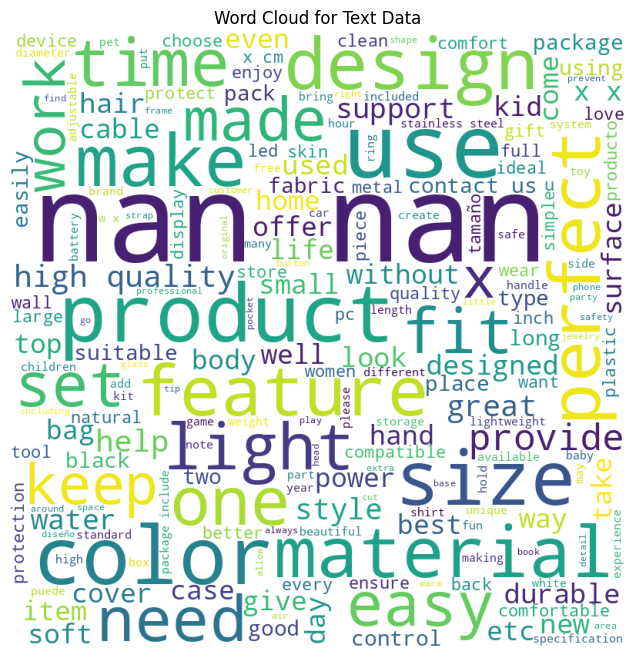

In [44]:
# iterations = [i for i in range(len(f1_score_jp))]
# f1_score_jp = f1_score(y_test_jp, y_pred_tfidf_jp, average='micro')

# plt.plot(iterations, f1_score_jp, label='Japanese', marker='o')
# plt.plot(iterations, f1_score_en, label='English', marker='o')
# plt.plot(iterations, f1_score_es, label='Spanish', marker='o')
# plt.xlabel('Iterations')
# plt.ylabel('F1 Score')
# plt.title('F1 Score versus Iterations')
# plt.legend()
# plt.show()


from wordcloud import WordCloud

# Combining all text data into a single string
df = pd.read_csv('/content/drive/MyDrive/Amazon (LA) - Multi-Class Product Classification (Team A)/Datasets/preprocessed_merged_data.csv')

text_data = ' '.join(df['product_description'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate(text_data)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()